# Algorithm 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cmap import Colormap
from scipy.special import comb
from itertools import combinations_with_replacement
from collections import Counter
from functions import *

## Computation of eigenvalues with the expoenential kernel

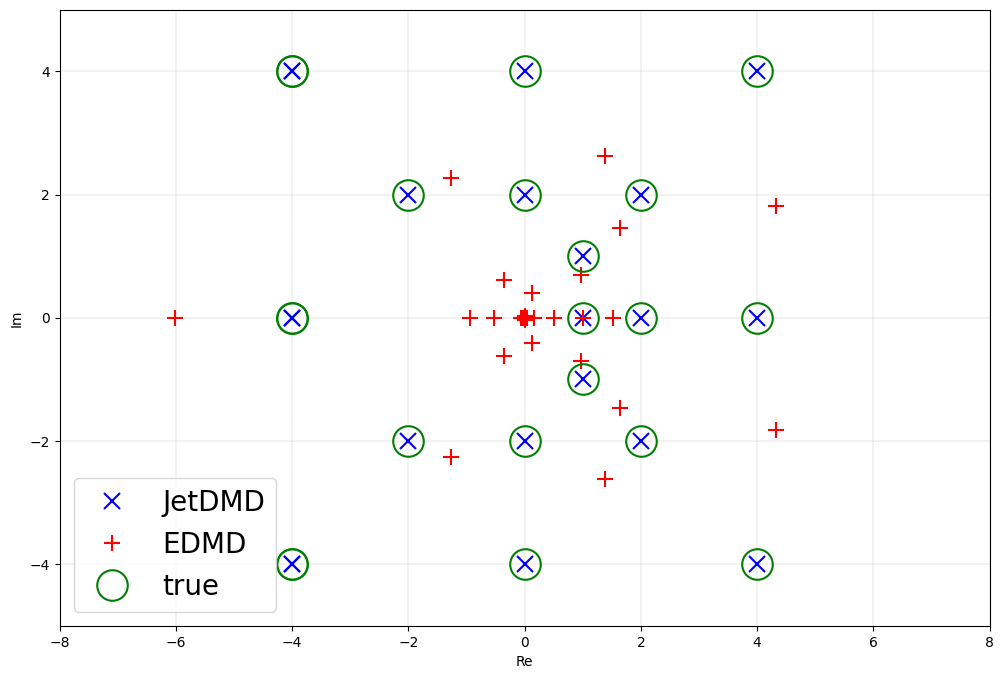

In [2]:
d = 2 # dimension
m = 5
n = 10
rm = comb(m+d,d, exact = True) # dimension of V_{p,m}
rn = comb(n+d,d, exact = True) # dimension of V_{p,n}
N = 100 # number of sample

# Uniformly random sapmling from [-1,1]^2
X = 2*np.random.rand(d,N) - 1 

# Image of X under f(x,y) = (x^2 - y^2 + x - y, 2xy + x + y)
def f_intro(x): 
  return np.array([x[0]**2 - x[1]**2 + x[0] - x[1],2*x[0]*x[1] + x[0] + x[1]])
Y = f_intro(X)

sigma_kernel = 1.0 #sigma of the exponential kernel

# Construction of V_m^Y and V_n^X
p = np.zeros((d,1)) #fixed point of the dynamical system
b = p #shift parameter of the exponential kernel 
V_mY =  constV_exp(Y, p, m, sigma_kernel, b) #V_m^Y 
V_nX = constV_exp(X, p, n, sigma_kernel, b) #V_n^X

# Computation of the estimated Perron-Frobenius operator (output of Algorithm 1)
C_JetDMD = (V_mY@(np.linalg.pinv(V_nX)))[:,:rm]

# Computation of eigenvalues of the objective matrices
evals_estimated_JetDMD, _ = np.linalg.eig(C_JetDMD)

# Computation of the objective matrix and its eigenvalues in EDMD
V_nY = constV_exp(Y, p, n, sigma_kernel, b)
C_EDMD = (V_nY@(np.linalg.pinv(V_nX))) 
evals_estimated_EDMD, _ = np.linalg.eig(C_EDMD)

# Jacobian matrix of the dynamical system at 0
dfp=jacmat(p,f_intro)

# eigenvalues of the Jacobian matrix of the dynamical system at 0
eval_dfp=np.linalg.eig(dfp)[0][0] 

# make the array of multiplications of eigenvalues
evals_true =np.array([np.prod(ell, axis=0) for ell in combinations_with_replacement([1 + 0j] + list(eval_dfp),m)]) 

# Figure 1 in Introduction
plt.rc('axes', titlesize=20) 
plt.rc('legend', fontsize=20) 
ax=plt.figure(figsize=(12,8)).add_subplot()
ax.grid(True, linestyle='--', color='k', linewidth=0.1)
ax.plot(evals_estimated_JetDMD.real, evals_estimated_JetDMD.imag,  'x', c='blue', markersize=12, markeredgewidth=1.5, label='JetDMD')
ax.plot(evals_estimated_EDMD.real, evals_estimated_EDMD.imag,  '+', c='red', markersize=12, markeredgewidth=1.5, label='EDMD')
ax.plot(evals_true.real, evals_true.imag, 'go', alpha=1, markerfacecolor='none', markersize=22, markeredgewidth=1.5, label='true')
ax.set_xlim(-8,8)
ax.set_ylim(-5,5)
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.legend()
plt.show()